MSE	Linear: 569.78,	Quadratic: 61.33
R2	Linear: 0.83,	Quadratic: 0.98


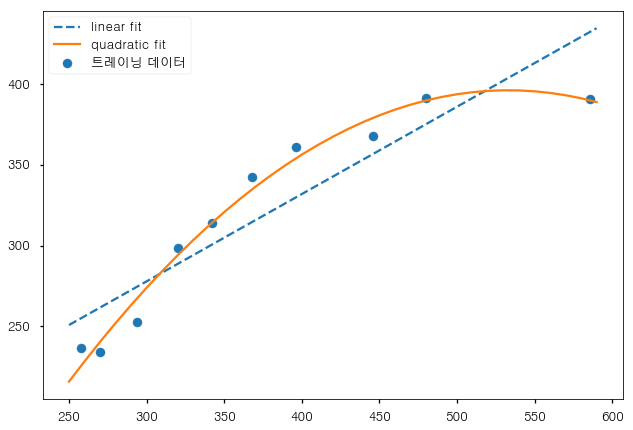

In [5]:
# 보스턴 외곽 지역 주택정보 14개 범주로 시작
# 회귀분석 - 다항회귀

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

#Polynomial code

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
             368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
             342.2, 360.8, 368.0, 391.2, 390.8])

# lr : Linear Regression (선형 회귀)
# pr : Polynomial Regression (다항 회귀)
lr = LinearRegression()
pr = LinearRegression()

# 다항 회귀를 위한 2차항 추가
# degree = 2
quadratic = PolynomialFeatures(degree=2)

# 트레이닝 데이터 X를 2차항이 적용된 다항 회귀 모델로 변형히여
# X_quad로 저장
X_quad = quadratic.fit_transform(X)

# 비교를 위해 단순 회귀 계산
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 다항 회귀를 위해 변형된 모델에 다중 회귀 모델 계산
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 단순 회귀 및 다항 회귀 모델의 예측값 계산
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

print('MSE\tLinear: %.2f,\tQuadratic: %.2f' %(mse_lin, mse_quad))
print('R2\tLinear: %.2f,\tQuadratic: %.2f' %(r2_lin, r2_quad))

plt.scatter(X, y, label='트레이닝 데이터')

plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc=2)
plt.show()

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 